In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')
import os 
os.nice(20)
%matplotlib inline
import graphlearn.utils.draw as myutils
import graphlearn.trial_samplers.graphlearn_easy as gl
import eden.graph as eg
from eden.converter.molecule.obabel import obabel_to_eden
import itertools

In [3]:
%%time
'''
Construct a grammar and train the associated estimator - no 3d information
'''
# learn a grammar
training_graphs = obabel_to_eden('AID2401_active.sdf')
training_size = 300
training_graphs = itertools.islice(training_graphs,training_size)
training_graphs, training_graphs_ = itertools.tee(training_graphs)

vectorizer = eg.Vectorizer(n = 3)
vectorizer.fit(training_graphs_)

sampler = gl.GraphLearnSampler(radius_list = [0,1,2], thickness_list = [1,2], vectorizer = vectorizer)
sampler.fit(training_graphs, core_interface_pair_remove_threshold = 3, interface_remove_threshold = 3)

CPU times: user 52.1 s, sys: 779 ms, total: 52.9 s
Wall time: 1min 11s


In [4]:
sampler.save('tmp/sample_easy_grammar_original.ge')

In [5]:
%%time
'''
with 3d information
'''
import sys
sys.path.append('..')
import os 
os.nice(20)
%matplotlib inline
import graphlearn.utils.draw as myutils
import graphlearn.trial_samplers.graphlearn_easy as gl
import eden.graph as eg
from eden.converter.molecule.obabel import obabel_to_eden3d
import itertools

# learn a grammar
training_graphs = obabel_to_eden3d('AID2401_active.sdf')
training_size = 300
training_graphs = itertools.islice(training_graphs,training_size)
training_graphs, training_graphs_ = itertools.tee(training_graphs)

vectorizer = eg.Vectorizer(n = 3)
vectorizer.fit(training_graphs_)

sampler = gl.GraphLearnSampler(radius_list = [0,1,2], thickness_list = [1,2], vectorizer = vectorizer)
sampler.fit(training_graphs, core_interface_pair_remove_threshold = 3, interface_remove_threshold = 3)

CPU times: user 1min 9s, sys: 811 ms, total: 1min 9s
Wall time: 1min 21s


/home/liconj/.local/lib/python2.7/site-packages/sklearn/calibration.py:398: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
/home/liconj/.local/lib/python2.7/site-packages/sklearn/calibration.py:408: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
/home/liconj/.local/lib/python2.7/site-packages/sklearn/calibration.py:410: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)


In [6]:
sampler.save('tmp/sample_easy_grammar_3d.ge')

interface: 147459


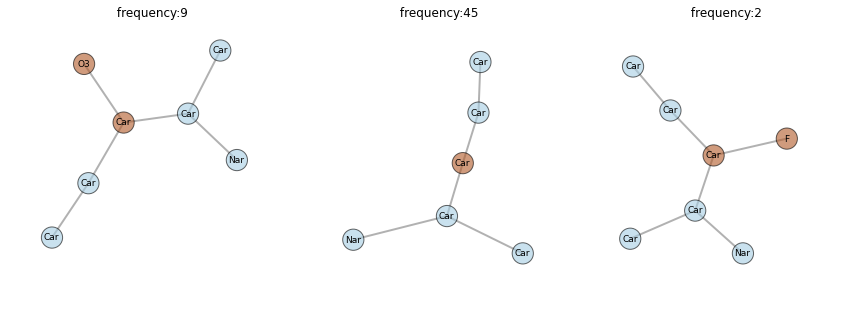

interface: 223236


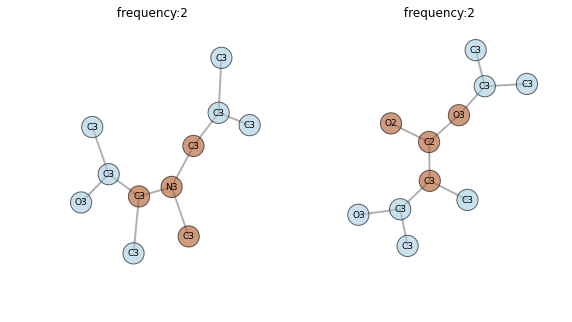

interface: 518486


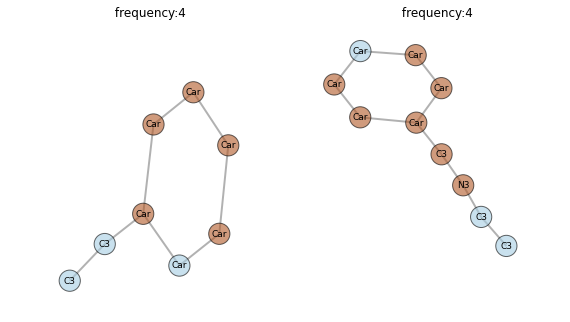

interface: 292873


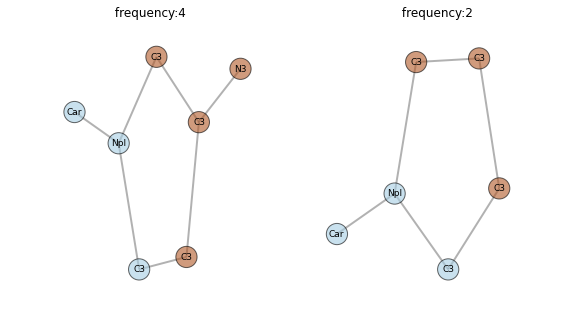

interface: 911524


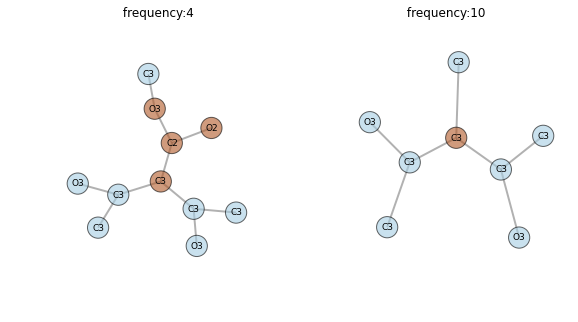

In [7]:
### Drawing the production rules, no 3d information

sampler_original = gl.GraphLearnSampler()
sampler_original.load('tmp/sample_easy_grammar_original.ge')
myutils.draw_grammar(sampler_original.local_substitutable_graph_grammar.grammar,
                     n_productions = 5,
                     n_graphs_per_line = 6, size = 5, 
                     colormap = 'Paired', invert_colormap = False, node_border = 1,
                     vertex_alpha = 0.6, edge_alpha = 0.3, node_size = 450)

interface: 286721


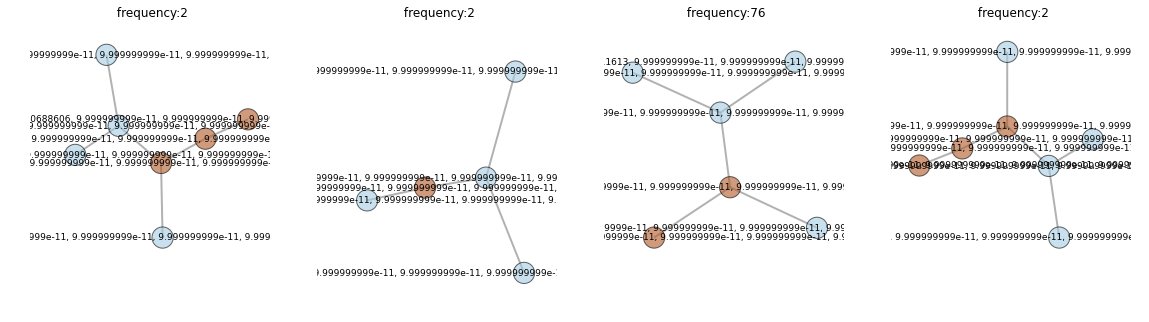

interface: 178179


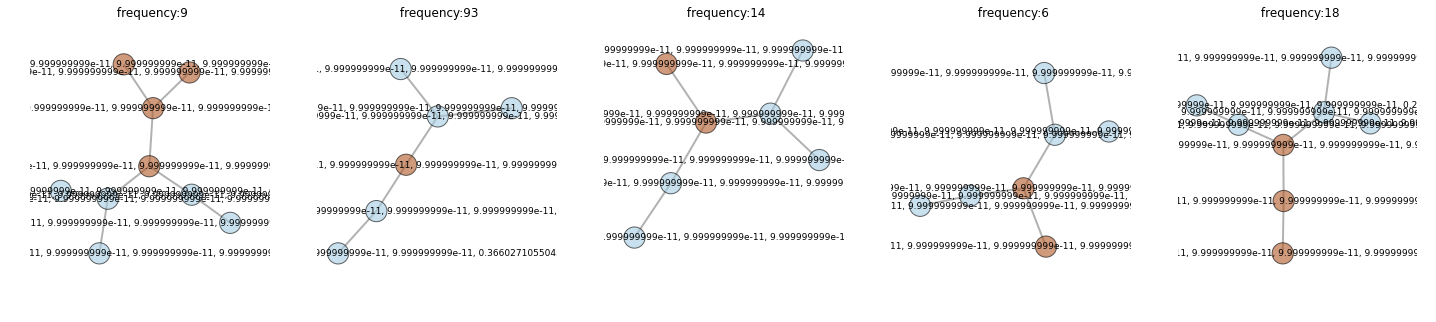

interface: 202763


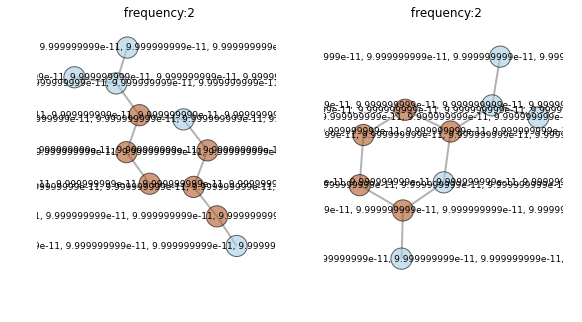

In [8]:
### Drawing the production rules, with 3d information

sampler_3d = gl.GraphLearnSampler()
sampler_3d.load('tmp/sample_easy_grammar_3d.ge')
myutils.draw_grammar(sampler_3d.local_substitutable_graph_grammar.grammar,
                    n_productions = 3,
                    n_graphs_per_line = 6, size = 5,
                    colormap = 'Paired', invert_colormap = False, node_border = 1,
                    vertex_alpha = 0.6, edge_alpha = 0.3, node_size = 450)

Graph id: 20


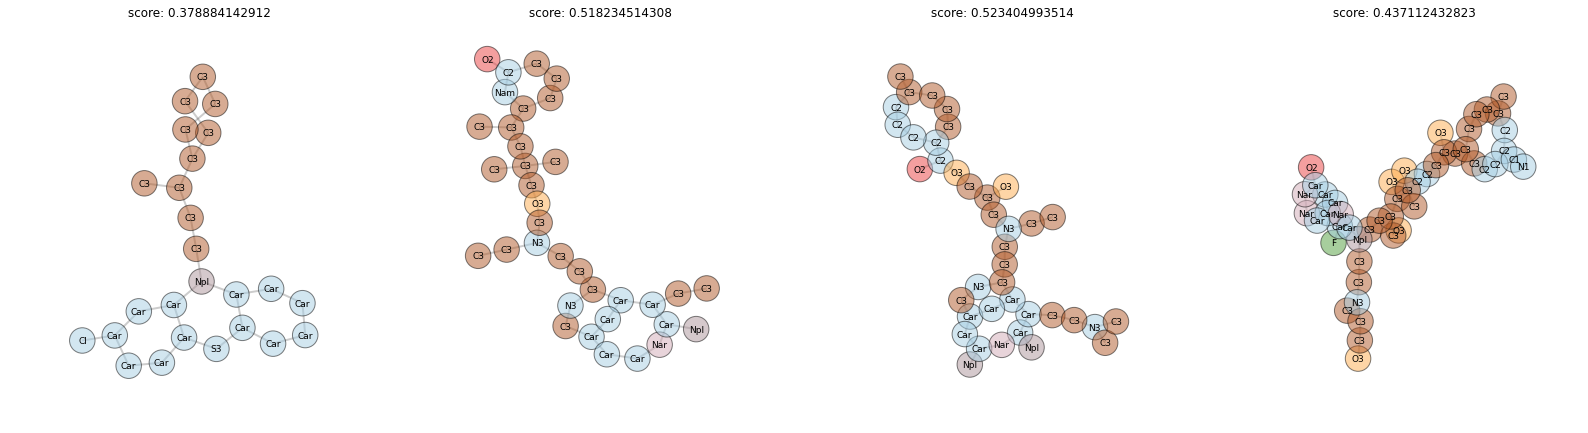

In [9]:
### Graph sampling, no 3d information
import sys
sys.path.append('..')
import os
os.nice(19)
%matplotlib inline
import graphlearn.utils.draw as myutils
import graphlearn.trial_samplers.graphlearn_easy as gl
from eden.converter.molecule.obabel import obabel_to_eden, obabel_to_eden3d
import itertools
import matplotlib.pyplot as plt
import eden.graph as ge

graphs = obabel_to_eden('AID2401_active.sdf')

id_start = 20
id_end = id_start + 1
graphs = itertools.islice(graphs,id_start,id_end)
n_steps = 50
sampler_original.feasibility_checker.draw_problem = True

graphs = sampler_original.sample(graphs,
                                 n_samples=4,
                                 n_steps=n_steps,
                                 select_cip_max_tries=100)

from eden.modifier.graph.vertex_attributes import colorize   
scores = []
ids = range(id_start,id_end)
for i, graph in enumerate(graphs):
    print 'Graph id: %d'%(ids[i])
    scores.append(graph.graph['sampling_info']['score_history'])
    path_graphs = graph.graph['sampling_info']['graphs_history']
    path_graphs = colorize(path_graphs,
                           output_attribute = 'color_level', 
                           labels = ['Car','So2','F', 'O2','O3','Nar','Npl','C3'])
    
    myutils.draw_graph_set(path_graphs,
                           n_graphs_per_line=6, size=7, 
                           colormap='Paired', invert_colormap=False,node_border=0.5, vertex_color='color_level',
                           vertex_alpha=0.5, edge_alpha=0.2, node_size=650,
                           headlinehook= myutils.get_score_of_graph)




In [10]:
### Graph sampling, with 3d information
import sys
sys.path.append('..')
import os
os.nice(19)
%matplotlib inline
import graphlearn.utils.draw as myutils
import graphlearn.trial_samplers.graphlearn_easy as gl
from eden.converter.molecule.obabel import obabel_to_eden, obabel_to_eden3d
import itertools
import matplotlib.pyplot as plt
import eden.graph as ge

graphs = obabel_to_eden3d('AID2401_active.sdf')

id_start = 20
id_end = id_start + 5
graphs = itertools.islice(graphs,id_start,id_end)
n_steps = 50
sampler_3d.feasibility_checker.draw_problem = True

graphs = sampler_3d.sample(graphs,
                           n_samples=4,
                           n_steps=n_steps,
                           select_cip_max_tries=100)

from eden.modifier.graph.vertex_attributes import colorize   
scores = []
ids = range(id_start,id_end)


In [11]:
graph = graphs.next()
for n, d in graph.nodes_iter(data=True):
    print n, d


0 {'text_label': 'Cl', 'node': True, 'hlabel': [686172], 'ID': 0, 'label': [9.999999999e-11, 9.999999999e-11, 9.999999999e-11, 9.999999999e-11, 9.999999999e-11, 9.999999999e-11, 9.999999999e-11, 9.999999999e-11, 9.999999999e-11, 0.50002414108099813, 0.36099373954750563, 0.36098797013790823, 9.999999999e-11, 9.999999999e-11, 9.999999999e-11, 9.999999999e-11, 9.999999999e-11, 9.999999999e-11, 0.22074163700769864, 0.14193954723042937, 0.1105554372180489, 9.999999999e-11, 9.999999999e-11, 9.999999999e-11, 9.999999999e-11, 9.999999999e-11, 9.999999999e-11, 0.19726690281641915, 9.999999999e-11, 9.999999999e-11]}
1 {'text_label': 'S3', 'node': True, 'hlabel': [686172], 'ID': 1, 'label': [9.999999999e-11, 9.999999999e-11, 9.999999999e-11, 9.999999999e-11, 9.999999999e-11, 9.999999999e-11, 9.999999999e-11, 9.999999999e-11, 9.999999999e-11, 0.50000550012100342, 0.49998384979336713, 0.36602710550451206, 9.999999999e-11, 9.999999999e-11, 9.999999999e-11, 9.999999999e-11, 9.999999999e-11, 9.9999999

In [12]:
path_graphs = graph.graph['sampling_info']['graphs_history']

In [13]:
from eden.util.display import serialize_graph
print serialize_graph(graph)

TypeError: <networkx.classes.graph.Graph object at 0x788ea10> is not JSON serializable

In [ ]:
path_graphs = colorize(path_graphs, output_attribute = 'color_level', labels = ['Car','So2','F', 'O2','O3','Nar','Npl','C3'], mode = "3D")

In [ ]:
path_graphs = path_graphs.next()

In [ ]:

for i, graph in enumerate(graphs):
    print 'Graph id: %d'%(ids[i])
    scores.append(graph.graph['sampling_info']['score_history'])
    path_graphs = graph.graph['sampling_info']['graphs_history']
    path_graphs = colorize(path_graphs,
                           output_attribute = 'color_level', 
                           labels = ['Car','So2','F', 'O2','O3','Nar','Npl','C3'])
    
    myutils.draw_graph_set(path_graphs,
                           n_graphs_per_line=6, size=7, 
                           colormap='Paired', invert_colormap=False,node_border=0.5, vertex_color='color_level',
                           vertex_alpha=0.5, edge_alpha=0.2, node_size=650,
                           headlinehook= myutils.get_score_of_graph)